### Exercise 1.02
__Dealing with messy data__

_Missing data_

In [1]:
import seaborn as sns
import numpy as np
tips = sns.load_dataset('tips')

In [2]:
size = tips["size"]
size.loc[:15] = np.nan
size.head(20)

/home/xps/Desktop/VirtualEnvs/packt_pytorch/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

In [3]:
size.shape

(244,)

In [4]:
size.isnull().sum()

16

In [5]:
mean = size.mean()
mean = mean.round()
mean

3.0

In [6]:
size.fillna(mean, inplace=True)
size.head(20)

0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

_Outliers_

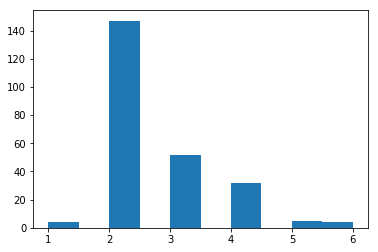

In [7]:
import matplotlib.pyplot as plt
plt.hist(size)
plt.show()

In [8]:
min_val = size.mean() - (3 * size.std())
min_val

-0.19743490657874485

In [9]:
max_val = size.mean() + (3 * size.std())
max_val

5.369566054119728

In [10]:
outliers = size[size > max_val]
outliers.count()

4

In [11]:
outliers

125    6.0
141    6.0
143    6.0
156    6.0
Name: size, dtype: float64

In [12]:
size = size[size <= max_val]
size.shape

(240,)

### Exercise 1.03
__Applying Feature Engineering over Text Data__

In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [14]:
enc = LabelEncoder()
tips["sex"] = enc.fit_transform(tips['sex'].astype('str'))
tips["smoker"] = enc.fit_transform(tips['smoker'].astype('str'))
tips["day"] = enc.fit_transform(tips['day'].astype('str'))
tips["time"] = enc.fit_transform(tips['time'].astype('str'))

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,3.0
1,10.34,1.66,1,0,2,0,3.0
2,21.01,3.50,1,0,2,0,3.0
3,23.68,3.31,1,0,2,0,3.0
4,24.59,3.61,0,0,2,0,3.0
